**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

**Load dataset**

In [3]:
df = pd.read_csv('Q3.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9954 non-null   int64  
 1   gender          9954 non-null   object 
 2   area            9954 non-null   object 
 3   qualification   9954 non-null   object 
 4   income          9953 non-null   object 
 5   marital_status  9953 non-null   float64
 6   vintage         9953 non-null   float64
 7   claim_amount    9953 non-null   float64
 8   num_policies    9953 non-null   object 
 9   policy          9953 non-null   object 
 10  type_of_policy  9953 non-null   object 
 11  cltv            9952 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 933.3+ KB


**Data cleaning**

In [5]:
# Remove data records with negative vintage quantity
df.loc[df['vintage'] < 0].shape

(1, 12)

In [6]:
df = df.loc[df['vintage'] >= 0]

In [7]:
df.shape

(9952, 12)

In [8]:
# Remove a very few records with missing values
df = df.dropna()
df.shape

(9951, 12)

In [9]:
# Remove the record with policy of D
df = df.loc[df['policy'] != 'D']

In [10]:
df.shape

(9949, 12)

**Some EDA**

/var/folders/2z/zq8_f9rn02v5pyks4b7qmj2m0000gn/T/ipykernel_12989/1105076846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cltv"])


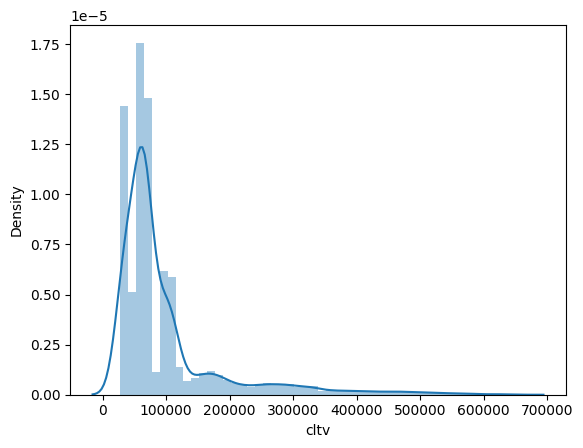

In [11]:
sns.distplot(df["cltv"])
plt.show()

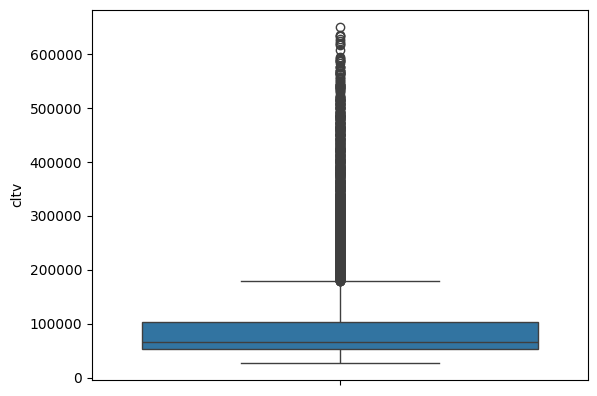

In [12]:
sns.boxplot(df["cltv"])
plt.show()

**One hot encoding**

In [13]:
from sklearn.preprocessing import OneHotEncoder
train = pd.get_dummies(df[['id','gender', 'area','qualification', 'income', 'marital_status', 'vintage', 'claim_amount','num_policies','policy','type_of_policy','cltv']])

In [14]:
train.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1.0,5.0,5790.0,64308.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0.0,8.0,5080.0,515400.0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1.0,8.0,2599.0,64212.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0.0,7.0,0.0,97920.0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1.0,6.0,3508.0,59736.0,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [15]:
train.drop(['gender_Female','gender_Male','area_Rural','area_Urban'],axis =1, inplace=True)

In [16]:
train.head()

,id,marital_status,vintage,claim_amount,cltv,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1.0,5.0,5790.0,64308.0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,2,0.0,8.0,5080.0,515400.0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,3,1.0,8.0,2599.0,64212.0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,4,0.0,7.0,0.0,97920.0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,5,1.0,6.0,3508.0,59736.0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


**Model buildiing**

In [36]:
from sklearn.model_selection import train_test_split

X = train.drop('cltv' , axis = 1)
y = train['cltv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [37]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (6964, 19)
The size of training output is (6964,)
**************************************************
The size of testing input is (2985, 19)
The size of testing output is (2985,)


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [39]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.14876417934039043
R^2 score for test: 0.1633507291583126


In [40]:
y_pred = model.predict(X_test)

In [41]:
print('RMSE:',np.sqrt(mse(y_test,y_pred)))
print("MAE",mae(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 84418.9111632699
MAE 51504.39636326641
R-squared: 0.1633507291583126


**Question: Any sales / marketing stragies to further improve CLV?**

Some suggested answers:
1. Offer a Referral Program
2. Provide Targeted, Personalized Campaigns
3. Put Them First – Hear Your Customers
4. Create Content to Keep Customers Engaged
5. Optimize Your Customer Service
6. Reward Your Most Loyal Clients
7. Benefit from Cross-Selling and Upselling Strategies